<img src="rupixen-Q59HmzK38eQ-unsplash.jpg" alt="Someone is trying to purchase a produce online" width="500"/>

Online shopping decisions rely on how consumers engage with online store content. You work for a new startup company that has just launched a new online shopping website. The marketing team asks you, a new data scientist, to review a dataset of online shoppers' purchasing intentions gathered over the last year. Specifically, the team wants you to generate some insights into customer browsing behaviors in November and December, the busiest months for shoppers. You have decided to identify two groups of customers: those with a low purchase rate and returning customers. After identifying these groups, you want to determine the probability that any of these customers will make a purchase in a new marketing campaign to help gauge potential success for next year's sales.

### Data description:

You are given an `online_shopping_session_data.csv` that contains several columns about each shopping session. Each shopping session corresponded to a single user. 

|Column|Description|
|--------|-----------|
|`SessionID`|unique session ID|
|`Administrative`|number of pages visited related to the customer account|
|`Administrative_Duration`|total amount of time spent (in seconds) on administrative pages|
|`Informational`|number of pages visited related to the website and the company|
|`Informational_Duration`|total amount of time spent (in seconds) on informational pages|
|`ProductRelated`|number of pages visited related to available products|
|`ProductRelated_Duration`|total amount of time spent (in seconds) on product-related pages|
|`BounceRates`|average bounce rate of pages visited by the customer|
|`ExitRates`|average exit rate of pages visited by the customer|
|`PageValues`|average page value of pages visited by the customer|
|`SpecialDay`|closeness of the site visiting time to a specific special day|
|`Weekend`|indicator whether the session is on a weekend|
|`Month`|month of the session date|
|`CustomerType`|customer type|
|`Purchase`|class label whether the customer make a purchase|

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load and view your data
shopping_data = pd.read_csv("online_shopping_session_data.csv")
shopping_data.head()

,SessionID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Month,CustomerType,Purchase
0,1,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,Feb,Returning_Customer,0.0
1,2,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,False,Feb,Returning_Customer,0.0
2,3,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,Feb,Returning_Customer,0.0
3,4,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,False,Feb,Returning_Customer,0.0
4,5,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,True,Feb,Returning_Customer,0.0


### Objective: calculate the percentage of customers by customer type, for November–December only

In [2]:
# Filter data for November and December
NovDec_data = shopping_data[shopping_data["Month"].isin(["Nov", "Dec"])]

# Group by CustomerType and calculate purchase rate
purchase_rates = NovDec_data.groupby("CustomerType")["Purchase"].mean().to_dict()

print(f'purchase_rates = {{"Returning_Customer": {purchase_rates["Returning_Customer"]:.3f}, '
      f'"New_Customer": {purchase_rates["New_Customer"]:.3f}}}')

purchase_rates = {"Returning_Customer": 0.196, "New_Customer": 0.273}


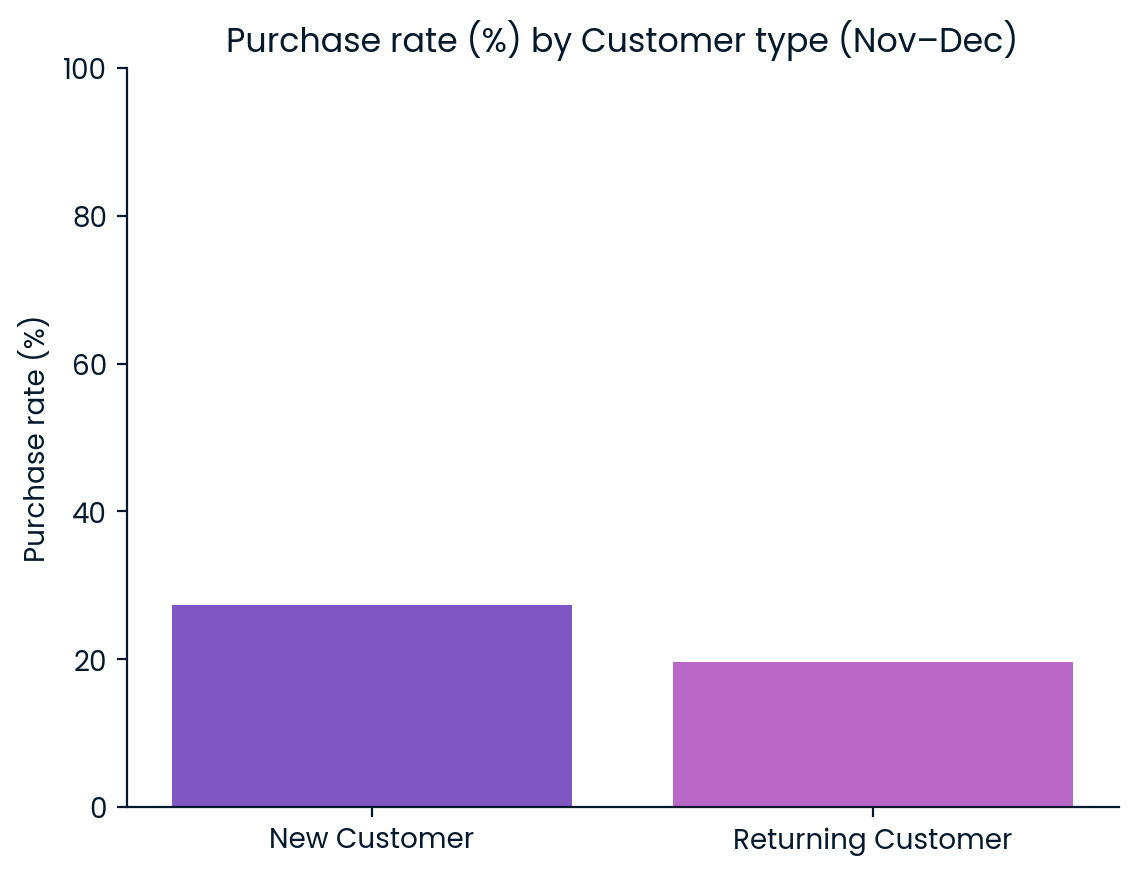

In [3]:
# Convert purchase rates to %
purchase_percent = {k: v * 100 for k, v in purchase_rates.items()}

# Visualise the result
plt.bar(purchase_percent.keys(), purchase_percent.values(), color=["#7E57C2", "#BA68C8"])
plt.title("Purchase rate (%) by Customer type (Nov–Dec)")
plt.ylabel("Purchase rate (%)")
plt.ylim(0, 100)
plt.xticks(
    ticks=range(len(purchase_percent)),
    labels=["New Customer", "Returning Customer"]
)

# Remove top/right borders for a clean BI look
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.show()

Analysis of online shopping sessions during the busiest months (November–December) reveals a noticeable difference in purchase likelihood between new and returning customers.
- New customers converted at an average rate of 27.3%, while
- Returning customers converted at 19.6%.

Although returning users are typically expected to have higher purchase intent due to prior familiarity, the data suggests the opposite. This might indicate that:
- The company’s holiday campaigns and promotions are particularly effective at attracting first-time buyers.
- Returning visitors could be browsing more without necessarily repurchasing, possibly comparing offers or waiting for better deals.

**From a marketing perspective**
- The higher conversion rate among new customers suggests strong acquisition performance, but weaker retention.
- Efforts should be made to re-engage returning customers, such as through personalised email recommendations, loyalty discounts, or targeted remarketing.

________

### Objective: for returning customers, find the 2 duration variables (*_Duration) that have the highest correlation

In [4]:
# Filter returning customers in Nov & Dec
returning = NovDec_data[NovDec_data["CustomerType"] == "Returning_Customer"]

# Select only duration columns
duration_cols = [col for col in returning.columns if "Duration" in col]
duration_data = returning[duration_cols]

# Compute correlation matrix
corr_matrix = duration_data.corr().abs()

# Get top correlation pair
corr_unstacked = corr_matrix.unstack().sort_values(ascending=False)
top_pair = [(x, y) for (x, y) in corr_unstacked.index if x != y][0]
top_correlation = {
    "pair": top_pair,
    "correlation": corr_matrix.loc[top_pair[0], top_pair[1]]
}

print(f'top_correlation = {{"pair": {top_correlation["pair"]}, "correlation": {top_correlation["correlation"]:.3f}}}')

top_correlation = {"pair": ('Administrative_Duration', 'ProductRelated_Duration'), "correlation": 0.417}


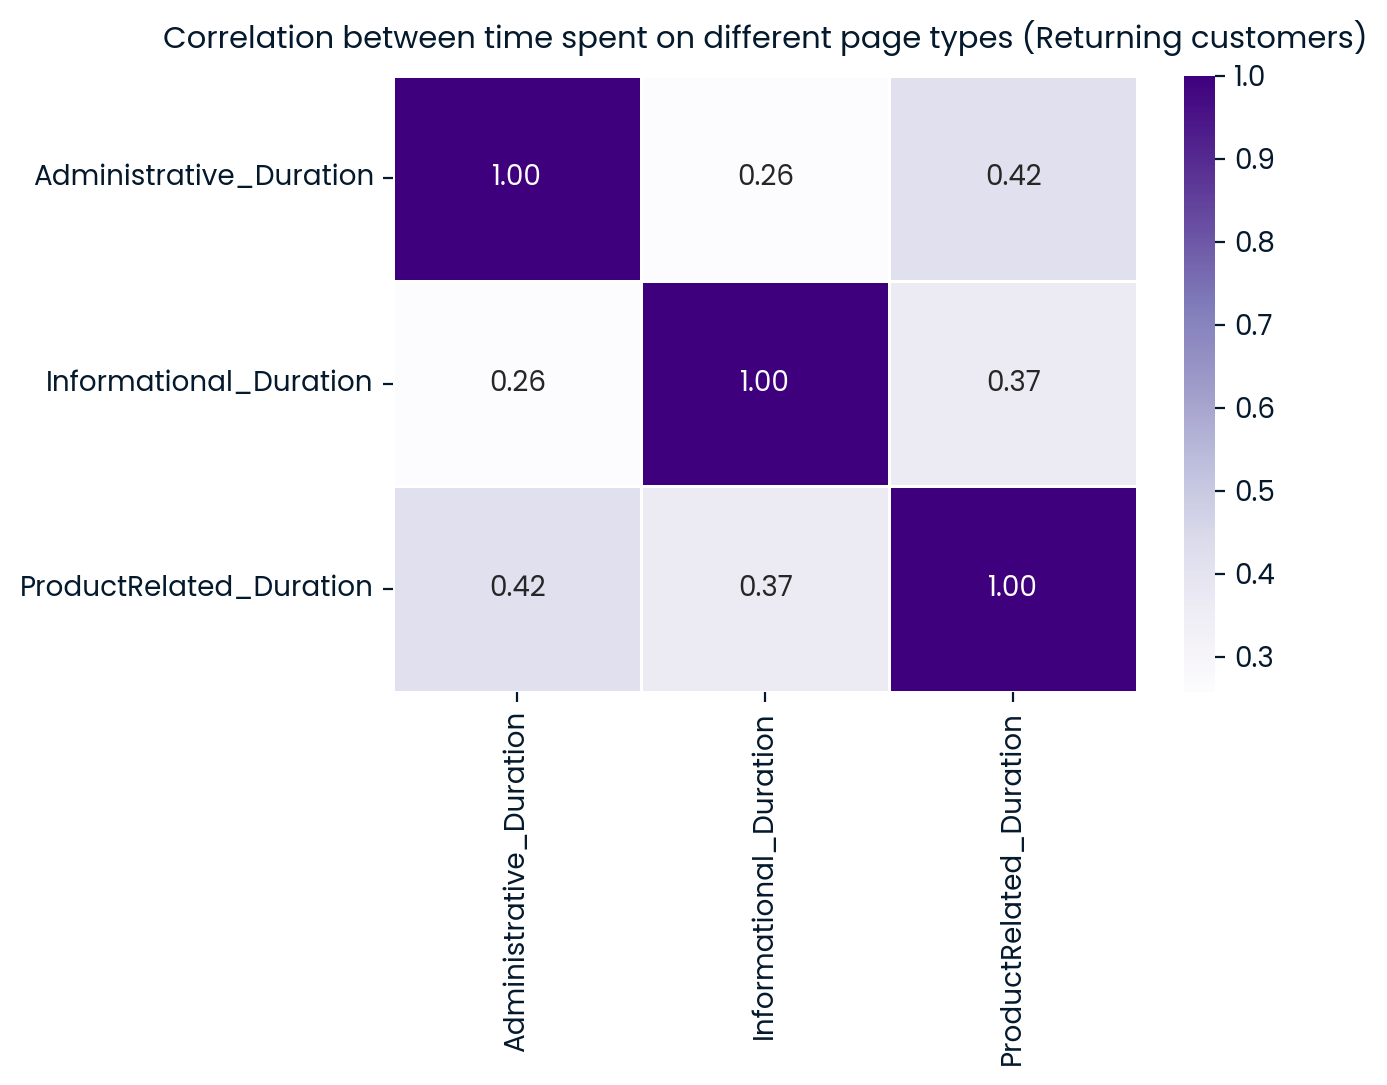

In [5]:
# Visualise the result

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="Purples", fmt=".2f", linewidths=0.5)
plt.title("Correlation between time spent on different page types (Returning customers)", fontsize=11, pad=10)
plt.show()

The heatmap illustrates the relationships between the time returning customers spent on different types of web pages during November and December.

Notably, the time spent on Administrative pages and Product-related pages shows the strongest correlation (0.42). This suggests that when returning customers spend more time managing their accounts or navigating transactional pages, they also tend to spend more time viewing product details. In other words, these users are likely to be engaged in goal-oriented, purchase-driven browsing behaviour, taking time to evaluate products before making a buying decision.

Meanwhile, the weaker correlations involving Informational pages (0.26–0.37) indicate that reading general content or site information plays a smaller role in their purchasing journey.

Overall, the results point towards a focused and intentional shopping pattern among returning customers that they interact mainly with pages that directly support purchasing decisions rather than casual browsing.

______

**Let p be the purchase rate of previous returning customers. New campaign increases by 15% → p_new = p * 1.15.**
### Objective: use binomial distribution to calculate the probability of having at least 100 orders in 500 sessions

In [6]:
# Original purchase rate for returning customers
p_original = purchase_rates['Returning_Customer']
p_new = min(p_original * 1.15, 1)  #cap at 1

# Parameters
n = 500  #sessions
k = 100  #target number of sales

# Probability of at least 100 sales
prob_at_least_100_sales = 1 - stats.binom.cdf(k-1, n, p_new)
prob_at_least_100_sales

0.9190464150313482

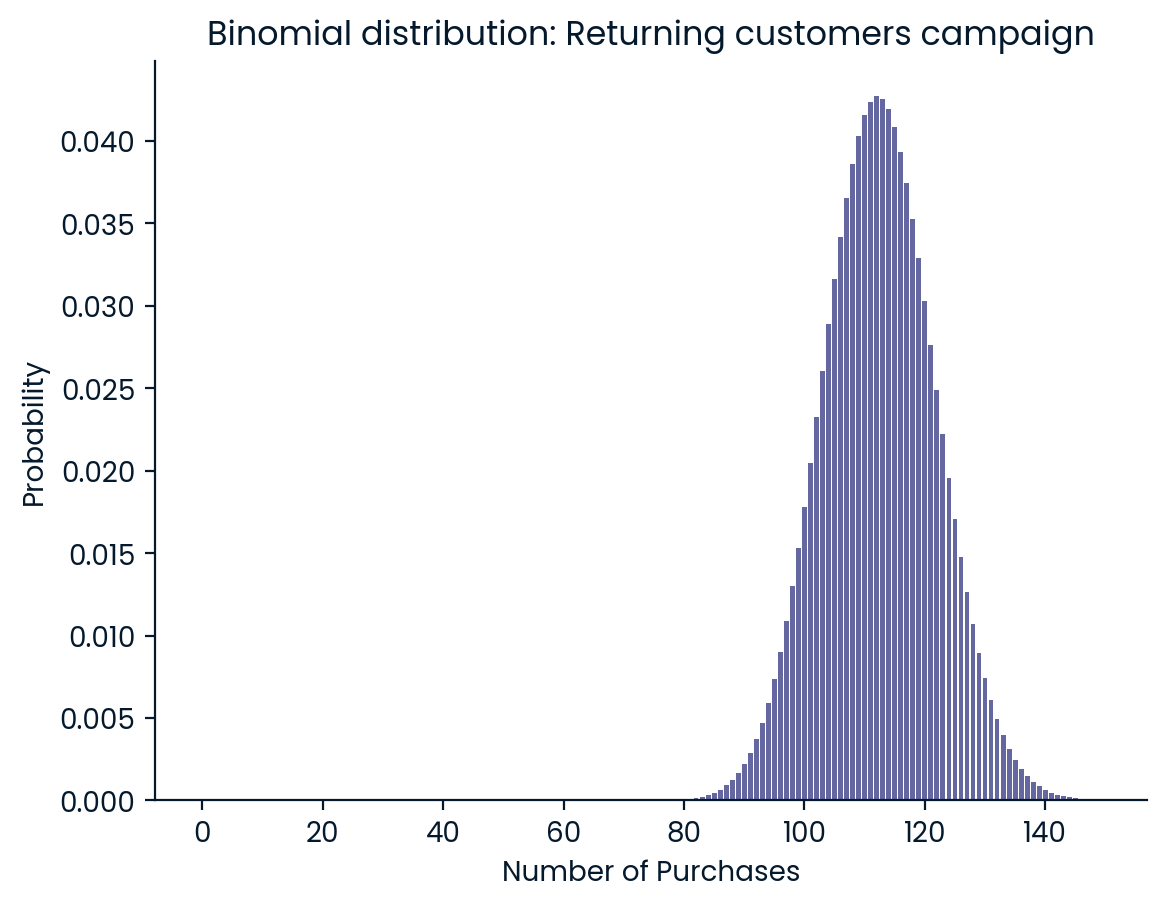

In [7]:
# Visualise the result

x = np.arange(0, 150)
plt.bar(x, stats.binom.pmf(x, n, p_new))
plt.title("Binomial distribution: Returning customers campaign")
plt.xlabel("Number of Purchases")
plt.ylabel("Probability")

# Remove top/right borders for a clean BI look
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.show()

The binomial probability distribution illustrates the likelihood of achieving at least 100 purchases out of 500 online shopping sessions by returning customers after a 15% increase in their purchase rate.

The calculated probability is approximately 91.9%, indicating a very strong likelihood that the campaign will reach or exceed the target of 100 sales. The distribution is centred around the mean of roughly 110 purchases, suggesting that most expected outcomes fall comfortably above the target threshold.

From a business perspective, this implies that the marketing campaign aimed at returning customers is highly promising. The uplift in conversion rate significantly boosts expected sales performance, demonstrating that investing in re-engagement and loyalty-based campaigns could deliver substantial returns during peak shopping months.